Okay in this project I will classify a review with 1-5 stars, given the comment the user has left. So its a classification problem, using NLP techniques. The data I will use will be yelp review data set from kaggle.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
yelp_df = pd.read_csv('yelp.csv')
yelp_df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [23]:
yelp_df = yelp_df[['text', 'stars']]
yelp_df

,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
2,love the gyro plate. Rice is so good and I als...,4
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,General Manager Scott Petello is a good egg!!!...,5
...,...,...
9995,First visit...Had lunch here today - used my G...,3
9996,Should be called house of deliciousness!\n\nI ...,4
9997,I recently visited Olive and Ivy for business ...,4
9998,My nephew just moved to Scottsdale recently so...,2


In [36]:
yelp_df.groupby('stars').describe()

text                                                               
      count unique                                                top freq
stars                                                                     
1       749    749  U can go there n check the car out. If u wanna...    1
2       927    926  This review is for the chain in general. The l...    2
3      1461   1461  We went here on a Saturday afternoon and this ...    1
4      3526   3526  love the gyro plate. Rice is so good and I als...    1
5      3337   3336                                      Great service    2

In [39]:
yelp_df['length'] = yelp_df['text'].apply(len)
yelp_df

/var/folders/hj/q5jr6s8s50g6rgdb0hlcrzgw0000gn/T/ipykernel_54478/4145072969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_df['length'] = yelp_df['text'].apply(len)


,text,stars,length
0,My wife took me here on my birthday for breakf...,5,889
1,I have no idea why some people give bad review...,5,1345
2,love the gyro plate. Rice is so good and I als...,4,76
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,419
4,General Manager Scott Petello is a good egg!!!...,5,469
...,...,...,...
9995,First visit...Had lunch here today - used my G...,3,668
9996,Should be called house of deliciousness!\n\nI ...,4,881
9997,I recently visited Olive and Ivy for business ...,4,1425
9998,My nephew just moved to Scottsdale recently so...,2,880


In [43]:
yelp_df['length'].max()

4997

In [55]:
#The biggest comment has four stars
yelp_df.loc[yelp_df['length']==4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: >]], dtype=object)

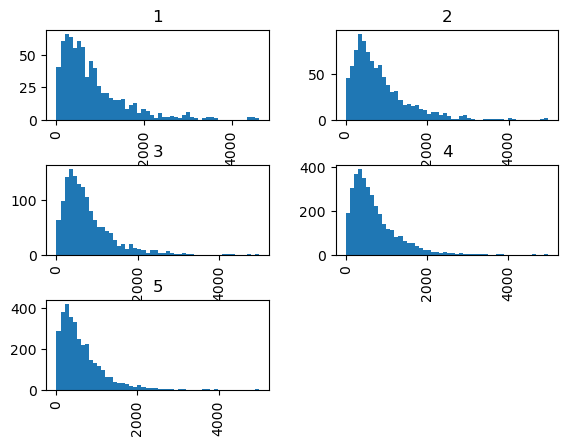

In [42]:
yelp_df.hist(column='length', by='stars', bins=50)

Now I will do the data **pre-processing** to be able to use nlp techniques. I will simply create a function that cleans the data

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/edinsonjimenezarita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
#Note the input has to be a string value
import string
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [15]:
#Nice it works! Pre-processing complete!
yelp_df['text'].head(5).apply(text_process)

0    [wife, took, birthday, breakfast, excellent, w...
1    [idea, people, give, bad, reviews, place, goes...
2    [love, gyro, plate, Rice, good, also, dig, can...
3    [Rosie, Dakota, LOVE, Chaparral, Dog, Park, co...
4    [General, Manager, Scott, Petello, good, egg, ...
Name: text, dtype: object

**Vectorization**

Okay, now I will go through the vectorization part of NLP. In this project I will not do stemming or part of speech. So practically, I will create a parse matrix that will have every unique work in the index (words of all the text of all the reviews), and every review on the column index. The values in matrix is the number of times every work appeared in given review. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


The point of having every review as a list of tokens (lemmas), is to be able to input it in a model so we can use machine learning techniques. So practically, every review (column), has N rows (Tokens / unique words), and the value of every point in that vector/lemma, is the amount of times that token was used in the review. 

I will split the data from here before creation of models

## Train Test Split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = yelp_df['text']
y = yelp_df['stars']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Vectorization

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

The model:

In [84]:
# This is the bag of words transformer, it takes all the words and makes the matrix above. The analyzer is basically our
#function that cleans the stopwords and puntuation
cv = CountVectorizer(analyzer=text_process)
#We fit our bag of words 'model using the data we already have from the reviews'
cv.fit(X_train)

CountVectorizer(analyzer=<function text_process at 0x7fa5fa4ccaf0>)

In [85]:
#print total of unique words
print(len(cv.vocabulary_))

35843


The matrix:

In [88]:
X_train1 = cv.transform(X_train)

In [89]:
print(X_train1[0],'\n\n', X_train1.shape)

  (0, 7680)	1
  (0, 8307)	1
  (0, 9028)	1
  (0, 10919)	1
  (0, 12673)	1
  (0, 15979)	1
  (0, 17105)	1
  (0, 17746)	1
  (0, 18378)	1
  (0, 19570)	1
  (0, 24247)	1
  (0, 24843)	2
  (0, 25130)	1
  (0, 26938)	1
  (0, 27479)	1
  (0, 27586)	1
  (0, 33601)	1
  (0, 33884)	1
  (0, 35133)	1
  (0, 35460)	1
  (0, 35665)	1 

 (7000, 35843)


What does this means? the zero simply meand that its the first segment (there is only one segment in this example), the second number is the token number identification of our bag of words (which we fitted using the yelp review dataset). So our Bag of words outputs the vector's values of the sparse matrix. 

It cannot give the matrix entirely, or in this case the vector entirely because it will be an unnecessary amount of zero values in that vector!

In [92]:
#shape of matrix, amount of times of non-zeros values in that matrix, and number of datapoints in matrix
print('Shape of Sparse Matrix: ', X_train1.shape)
print('Amount of Non-Zero occurences: ', X_train1.nnz)
print('Amount of cells in matrix: ', (X_train1.shape[0] * X_train1.shape[1]))

Shape of Sparse Matrix:  (7000, 35843)
Amount of Non-Zero occurences:  404772
Amount of cells in matrix:  250901000


In [93]:
#ITS ALWAYS GOOD TO CHECK SPARSITY SINCE WE USE SPARSE MATRIX AND NOT NORMAL MATRIX
sparsity = (100.0 * X_train1.nnz / (X_train1.shape[0] * X_train1.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.1613273761364044


Now that we have the sparse matrix for our entire dataset. We can give a weight to every token. That will give the importance of that word, given our training of our model, I will use the TF-IDF weight. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. 

## TFIDF Weight Transformer

In [94]:
from sklearn.feature_extraction.text import TfidfTransformer

The model:

In [95]:
#So practically, its the same concept than the sparse matrix, but instead of a matrix of 0s and 1s. I will have
#A matrix of the weighted TF-IDF values for every single token between 0-1. 
tfidf = TfidfTransformer().fit(X_train1)

The matrix:

In [96]:
#Doing all the weights for the entire dataset
X_train2 = tfidf.transform(X_train1)
print(X_train2.shape)

(7000, 35843)


I believe a problem with this project is that we are using the transform function (creating the weighted values), for our same parse matrix that we used to fit this same model. Is this something bad like when using linear regression? I am not sure, since NLP are not the same. Maybe it will cause an overfitting bias issue.

In [100]:
#We can also see that when we print the matrix it only gives the values that are non-zero. 
print(X_train1,'\n\n', X_train2, '\n\n', X_train)

  (0, 7680)	1
  (0, 8307)	1
  (0, 9028)	1
  (0, 10919)	1
  (0, 12673)	1
  (0, 15979)	1
  (0, 17105)	1
  (0, 17746)	1
  (0, 18378)	1
  (0, 19570)	1
  (0, 24247)	1
  (0, 24843)	2
  (0, 25130)	1
  (0, 26938)	1
  (0, 27479)	1
  (0, 27586)	1
  (0, 33601)	1
  (0, 33884)	1
  (0, 35133)	1
  (0, 35460)	1
  (0, 35665)	1
  (1, 2027)	1
  (1, 12521)	1
  (1, 13209)	1
  (1, 15993)	2
  :	:
  (6998, 27645)	3
  (6998, 28304)	1
  (6998, 28308)	1
  (6998, 28565)	1
  (6998, 29221)	1
  (6998, 29375)	1
  (6998, 29534)	1
  (6998, 30205)	1
  (6998, 30604)	1
  (6998, 30900)	1
  (6998, 31846)	1
  (6998, 33134)	1
  (6998, 33161)	1
  (6998, 33722)	1
  (6998, 33827)	1
  (6998, 33991)	2
  (6998, 34026)	1
  (6998, 34352)	1
  (6998, 34854)	2
  (6998, 35363)	1
  (6998, 35371)	1
  (6999, 2532)	1
  (6999, 2972)	1
  (6999, 10375)	1
  (6999, 15878)	1 

   (0, 35665)	0.169476568359856
  (0, 35460)	0.16181293167796199
  (0, 35133)	0.10978370690072412
  (0, 33884)	0.1148731276754862
  (0, 33601)	0.19013371846367214
  (0, 2758

In [101]:
print(X_train1.shape,'\n\n', X_train2.shape, '\n\n', X_train.shape)

(7000, 35843) 

 (7000, 35843) 

 (7000,)


So far we have TWO sparse matrices. One for the count of tokens, and another with the weight of tokens.

**Now I will train the model using BAYES NAIVE to do the classification of the dataframe given our dataset. To determine which
star its every review. I will separate dataset in train/test. Then used my classification model to test the data. Finally, I will Evaluate the model of my prediction compared to Actual values!**

In [118]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [119]:
nb.fit(X_train2, y_train)

MultinomialNB()

#Okay so whats happening right here? Basically every single review is an observation in the training of the model. Every token is considered a x-value of the data. Every unique word is basically a Xi. 
The classification output of our training is the column of stars in yelp_df. 

In [120]:
#Okay lets try a random review and classify to see if its accurate:
x = yelp_df['text'][100]
x_bow = cv.transform([x])
x_tfidf = tfidf.transform(x_bow)

print('predicted:',nb.predict(x_tfidf)[0])
print('expected:', yelp_df.stars[100])

predicted: 4
expected: 4


NICE EVERYTHING SEEMS PERFECT!!

## Goodness of fit

In [138]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [126]:
X_test[:3]

6676    I am going to give Aunty Chiladas 3 stars only...
6421    I've never been done wrong at Chelsea's. But I...
9834    I stop here every Monday night and negate two ...
Name: text, dtype: object

In [127]:
X_test1 = cv.transform(X_test)
X_test2 = tfidf.transform(X_test1)

In [139]:
#Now I want to do it with every single observation and evaluate the model! 
predictions = nb.predict(X_test2)
predictions

array([4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4,
       4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4,
       5, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 4, 4, 4, 5, 4, 5, 4, 4, 5, 4,
       4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4,
       4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 5, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,

In [140]:
y_test = np.array(y_test)
y_test

array([3, 4, 5, 5, 4, 2, 4, 5, 5, 5, 4, 4, 4, 5, 4, 5, 5, 5, 5, 3, 2, 4,
       4, 5, 3, 5, 5, 2, 4, 5, 4, 4, 3, 5, 5, 1, 4, 3, 3, 5, 4, 4, 5, 3,
       3, 1, 4, 3, 4, 5, 3, 4, 5, 4, 4, 5, 1, 4, 3, 4, 4, 5, 1, 4, 2, 4,
       4, 5, 4, 5, 4, 3, 5, 5, 4, 4, 5, 4, 5, 1, 5, 2, 4, 2, 2, 5, 4, 4,
       4, 4, 4, 4, 4, 5, 1, 4, 1, 4, 1, 4, 4, 2, 5, 3, 5, 5, 4, 4, 4, 3,
       5, 4, 4, 3, 5, 4, 4, 3, 5, 1, 4, 3, 4, 5, 4, 5, 4, 4, 3, 3, 5, 3,
       5, 5, 5, 5, 3, 4, 3, 3, 5, 4, 4, 4, 5, 2, 4, 5, 2, 4, 5, 5, 3, 5,
       5, 4, 5, 1, 3, 4, 5, 3, 2, 4, 2, 5, 5, 1, 1, 4, 5, 2, 3, 4, 5, 4,
       4, 4, 2, 5, 3, 3, 4, 2, 4, 5, 4, 3, 3, 4, 3, 4, 1, 1, 5, 2, 2, 4,
       3, 5, 5, 4, 4, 4, 2, 4, 3, 5, 3, 3, 4, 5, 1, 5, 4, 3, 4, 4, 3, 4,
       4, 4, 2, 4, 3, 5, 5, 5, 4, 4, 4, 4, 4, 1, 2, 5, 5, 4, 5, 5, 4, 5,
       4, 4, 4, 4, 4, 5, 4, 4, 4, 1, 5, 5, 3, 4, 5, 5, 5, 4, 5, 2, 3, 4,
       4, 5, 3, 1, 5, 1, 4, 4, 5, 5, 5, 4, 2, 4, 1, 5, 5, 5, 3, 3, 5, 4,
       5, 4, 5, 5, 2, 4, 3, 3, 4, 2, 3, 1, 5, 4, 4,

In [136]:
from sklearn.metrics import confusion_matrix,classification_report

In [137]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  0   0   0 188  32]
 [  0   0   0 261  12]
 [  0   0   0 418  25]
 [  0   0   0 948 116]
 [  0   0   0 672 328]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       220
           2       0.00      0.00      0.00       273
           3       0.00      0.00      0.00       443
           4       0.38      0.89      0.53      1064
           5       0.64      0.33      0.43      1000

    accuracy                           0.43      3000
   macro avg       0.20      0.24      0.19      3000
weighted avg       0.35      0.43      0.33      3000



/Users/edinsonjimenezarita/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edinsonjimenezarita/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edinsonjimenezarita/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Seems like something went wrong with the fitting of the BAYES NAIVE model, since the only predictions its actually making is 5 stars or 4 stars